
This is evidently a class project I did in 2013

Hammersely and Handscomb

A Quantum Monte Carlo approach to many-body physics - Linden https://www.huy.dev/Linden-PhysRep-1992.pdf

Werner Krauth - statistical mechanics algorithms and computations

Landau and Binder - a guide to monte carlo simulations in statistical physics

MontePython: Implementing Quantum Monte Carlo using Python

Quantum Monte Carlo - ceperley and Alder



There was a lecture course?


# Python Code
## 1d laplace walk

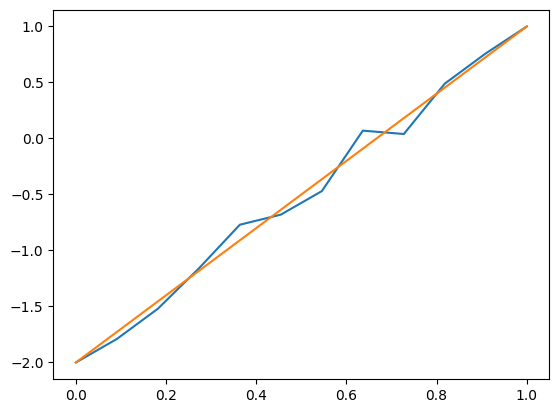

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 01 00:06:17 2013

@author: Philip
"""

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

trials = 100
points = 10

a = -2.
b = 1.

x = np.linspace(0,1,points+2)
y = np.zeros(points+2)
y[:] = (b-a)*x[:]+a
u = np.zeros(points+2)
for i in range(points):
    for k in range(trials):    
        j = i
        while j > -1 and j < points:    
            j = j - 1 + 2*np.random.randint(2)
        if j > points/2:
            u[i] = u[i]+b/trials
        else:
            u[i] = u[i]+a/trials
u[1:-1]=u[0:-2]
u[0]=a
u[-1]=b
plt.plot(x,u)
plt.plot(x,y)
plt.show()

## carlo matrixmul.py

In [ ]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt


def randchoice(probarray):
    num = np.random.rand()
    runsum = 0
    for i in range(len(probarray)):
        runsum = runsum + probarray[i]
        if runsum >= num:
            return i
    return None

A = np.array([[0.2, 0.3],
             [0.7, 0.6]])

exp = 3
print np.linalg.matrix_power(A, 3)


trials = 10000
count = np.zeros((2,2))

for start in range(2):
    for i in range(trials):       
        state = start
        for j in range(exp):
            state = randchoice(A[:,state])
            if state == None:
                #print "huh"
                break
        if state != None:
            count[state,start] = count[state,start] + 1
        
count[:,:] = count[:,:]/trials
print count

## diffusion_test.py

In [ ]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt


dt = 0.02
sigma = np.sqrt(2*dt)

x = np.linspace(-1,1,100)

y = np.sqrt(1/(4*dt*np.pi)) *np.exp(-x*x/(4*dt))

plt.hist(sigma * np.random.randn(3000),bins=50,normed=1)
plt.plot(x,y)
plt.show()

## projector_mc.py


In [ ]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

maxwalker = 1500
walkernum = 600
walkerindex = walkernum


#Interval from 0 to 1

walker = 0.5 * np.ones(walkernum)
dt = 0.01
dx = 0.1
E_0 = 9.
eps = 1. #energy update parameter 

sigma = np.sqrt(2*dt)
"""
#given array of probabilties, selects from corresponding distrubtion,
#returns index of chosen, returns None if none chosen
def randchoice(probarray):
    num = np.random.rand()
    runsum = 0
    for i in range(len(probarray)):
        runsum = runsum + probarray[i]
        if runsum >= num:
            return i
    return None
    """

def V(x):
    return 0
"""
def discretediffuse():
    for i in range(walkernum):
        walker[i]=walker[i]-1+ randchoice(
"""
def diffuse(walker):
    walker[:] = walker[:] + sigma * np.random.randn(len(walker))[:]
    for i in range(len(walker)-1,-1,-1):
        if walker[i] < 0 or walker[i] > 1:
            
            walker = np.delete(walker,i)
    return walker

def Energyupdate(walker,E_0):
    #print E_0
    #print eps * (len(walker)-walkernum)/walkernum
    return E_0 - eps* (len(walker)-walkernum)/walkernum/dt
"""
def Walkerbirth(walker,E_0):
    
    births = int(np.random.rand() + np.exp(dt * E_0))
    #print np.exp(dt * E_0)
    #print births
    for i in range(births):
        k = len(walker)
        j = np.random.randint(k)
        newwalk = walker[j]
        walker = np.append(walker,newwalk)
    return walker
    """
def Walkerbirth(walker,E_0):
    

    for i in range(len(walker)-1,-1,-1):
        copies = int(np.random.rand() + np.exp(dt * (E_0 - V(walker[i]) ) ) )
        
        if copies > 3:
            copies = 3
        if copies < 1:
            walker = np.delete(walker,i)
        if copies > 1:   
            for j in range(copies-1):
                walker = np.append(walker,i)
    return walker

#plt.hist(walker)
runs = 100
for i in range(runs):
    walker = diffuse(walker)
    #print len(walker)
    E_0 = Energyupdate(walker,E_0)
    walker = Walkerbirth(walker,E_0)
    
    #print E_0
    print len(walker)

plt.hist(walker,bins=20)
print(E_0)
plt.show()

## Projector_mc2.py


In [ ]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import numpy.ma as ma

eps = 1.
dt = 0.02


class Walker:
    
    #def __init__(self):
    maxwalker = 10
    #positions =  0.5 * np.ones(maxwalker)
    positions =  0.5 * ma.ones(maxwalker)
    positions[-1]=ma.masked
    current = 200
    equil = 200

    def diffuse(self,dt):
        sigma = np.sqrt(2*dt)
        walkersize = int(ma.count(self.positions))
        
        self.positions[~self.positions.mask] = \
            self.positions[~self.positions.mask] + \
                sigma * np.random.randn(walkersize)[:]

        self.positions = ma.masked_greater(self.positions,1.)
        self.positions = ma.masked_less(self.positions,0.)
        #print self.positions.mask
    def BirthDeath(self,E_0):
        for i in range(maxwalker):
            if self.positions.mask[i] == False:
                pos = self.positions[i] 
                copies = int(np.random.rand() + np.exp(dt * (E_0 - V(pos) ) ) )
                if copies < 1:
                    self.positions[i]==ma.masked
                else:
                    self.positions[self.positions.mask.index(True)[:Count]] = self.positions[i] 
                    
                        
                        
                    
        
        self.positions
        
        
        
        
def V(x):
    return 0

def Energyupdate(walker,E_0):

    return E_0 - eps* (len(walker)-walkernum)/walkernum/dt

mywalker = Walker()
print mywalker.positions
mywalker.diffuse(dt)
print mywalker.positions

## Operatiralg.py

In [ ]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt



class State:

    ket = np.array([])
    weight = 1

    def create(self,i):
        if i in self.ket:
            self.ket = []
        else:
            self.ket = np.append(self.ket,i)

    def annihilate(self,i): 
        if i in self.ket:
            ind = np.where(self.ket==i)[0][0]
            self.ket = np.delete(self.ket,ind)
            if (len(self.ket) - ind) % 2 == 1:
                self.weight = self.weight * (-1)

ket1 = State()

for i in range(3):
    ket1.create(i)

print ket1.ket


ket1.annihilate(1)

print ket1.ket
print ket1.weight

# Proposal


From the Schrodinger equation perspective, a hunk of coal is a PDE that
needs to be solved in something like 1023 coupled dimensions. This is just plain
too much to do. Really we'd be doing more computations than we have atoms
in our CPU. Even a more modest goal of 100 particles, an insignicant speck,
will be highly taxing.
Doing huge dimensional problems numerically gets real tough real fast. For
example, The number of computations required to perform an integral with a
regular naive quadrature technique goes up exponentially with the number of
denitions. What might take 70 runs through a loop in one dimension may
take 70100 in 100 dimensions. A very successful approach to the problem has

been Density Functional Theory, which reduces the dimensionality of the com-
putation of the ground state energy. Practical Density Functional theory uses

approximations for terms in the Hamiltonian, which can sometimes go awry.

Quantum Monte Carlo methods oer an alternative. They do not approxi-
mate the Hamiltonian, but by relaxing your requirements to getting an answer

that is only probably correct instead of deterministically almost correct, you
can nd ways to speed up the computation signicantly. In addition, probably
correct isn't so bad since you can make your answer have an arbitrarily high
probability of being correct and this increase in probability is not as brutally
dependent upon dimensionality.
In my project I will explain what the common classes of Quantum Monte
Carlo methods are doing, why they work, and implement a computation of a
pedagogical many-body system in Python.
References
[1] W. M. C. Foulkes, L. Mitas, R. J. Needs and G. Rajagopal Quantum Monte
Carlo simulations of solids Reviews of Modern Physics, Vol. 73, No. 1,
January 2001
[2] J.K. Nilsen MontePython: Implementing Quantum Monte Carlo using
Python arXiv:physics/0609191

[3] Paulo H. Acioli Review of quantum Monte Carlo methods and their appli-
cations Journal of Molecular Structure (Theochem) 394 (1997) 75-85